In [1]:
import pandas as pd

df = pd.read_csv("../Data/2019.csv")

eda_df = df[
    [
        "Score",
        "GDP per capita",
        "Social support",
        "Healthy life expectancy",
        "Freedom to make life choices",
        "Generosity",
        "Perceptions of corruption",
    ]
]

### Data Integrity and Reproducibility Check

Before applying any modeling techniques, a data integrity check was performed to confirm that:

- The dataset was loaded correctly.
- The modeling subset contained only the intended variables.
- No missing values were present in the variables used for modeling.

This step is necessary because both linear regression and K-means clustering assume complete numeric input. Verifying data integrity ensures that model results are reproducible and not influenced by implicit row removal or imputation.

In [2]:
# Quick reproducibility / data quality checks
print("df shape:", df.shape)
print("eda_df shape:", eda_df.shape)

display(df.head(3))
display(eda_df.isna().sum())

df shape: (156, 9)
eda_df shape: (156, 7)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

# Modeling Methods Overview

This notebook presents selected modeling techniques applied after exploratory analysis of the 2019 World Happiness dataset. The focus is on explaining why each method was chosen, what insights it provides, and what limitations apply, rather than reproducing all modeling steps in full detail.

To ensure reproducibility, the modeling subset used during exploratory analysis is explicitly recreated before applying any modeling techniques.

Linear regression and K-means clustering are implemented in code as representative cross-sectional methods to illustrate relationship modeling and multivariate pattern discovery. Time-series analysis is discussed conceptually to highlight how analytical approaches differ when working with temporally ordered data.

Because the 2019 World Happiness dataset represents a single cross-sectional snapshot rather than longitudinal observations, only cross-sectional modeling techniques are demonstrated in this notebook.

## 1. Linear Regression

Linear regression was applied to quantify the relationship between happiness scores and selected socio-economic factors, particularly GDP per capita and social support. This method was chosen because exploratory analysis suggested approximately linear relationships between these variables and overall happiness.

The regression analysis allowed for:
- Estimating the strength and direction of relationships between predictors and happiness scores.
- Assessing how much variance in happiness could be explained by individual factors.
- Providing an interpretable baseline model for comparison with other analytical approaches.

However, linear regression assumes linearity, independence, and homoscedasticity, and it does not capture complex or non-linear relationships between variables.

GDP per capita was modeled independently to provide a transparent, interpretable baseline relationship before introducing multivariate or unsupervised methods.

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = eda_df[["GDP per capita"]]
y = eda_df["Score"]

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

slope, intercept

(2.2181480010083585, 3.399345178292416)

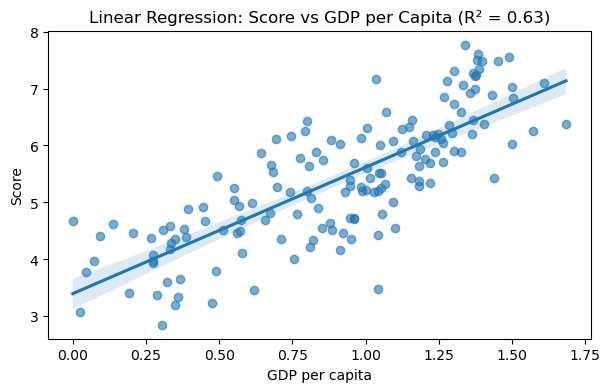

0.6302500079104005

In [4]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

plt.figure(figsize=(7, 4))
sns.regplot(x="GDP per capita", y="Score", data=eda_df, scatter_kws={"alpha": 0.6})
plt.title(f"Linear Regression: Score vs GDP per Capita (R² = {r2:.2f})")
plt.show()

r2

## Linear Regression Interpretation

The positive slope indicates that higher GDP per capita is associated with higher happiness scores. The R² value suggests that a substantial proportion of variance in happiness can be explained by GDP alone.

However, this model does not imply causality and does not account for interactions between multiple socio-economic factors. The regression is intentionally univariate and serves as a baseline comparison rather than a comprehensive explanatory model.

## 2. K-Means Clustering

K-means clustering was applied to explore whether countries could be grouped into distinct well-being profiles based on multiple socio-economic indicators. This method was chosen to identify patterns that may not be apparent through pairwise or linear analysis alone.

Clustering helped to:
- Group countries with similar happiness and socio-economic characteristics.
- Explore potential development or well-being profiles across countries.
- Complement regression analysis by capturing multivariate structure in the data.

However, K-means clustering requires the number of clusters to be specified in advance and assumes that clusters are roughly spherical and similar in size. As a result, the method may oversimplify complex or overlapping country profiles.

The number of clusters (k = 3) was selected to provide a high-level segmentation of countries into broadly interpretable well-being profiles (e.g., lower, medium, and higher well-being). The goal is exploratory pattern discovery rather than optimal cluster determination.

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

eda_df = eda_df.copy()

X_cluster = eda_df[
    [
        "GDP per capita",
        "Social support",
        "Healthy life expectancy",
        "Freedom to make life choices",
    ]
].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)

eda_df.loc[:, "Cluster"] = clusters

eda_df["Cluster"].value_counts()

Cluster
2    68
0    47
1    41
Name: count, dtype: int64

The scatter plot with fitted regression line visually illustrates the direction, strength, and dispersion of the linear relationship between GDP per capita and happiness score.

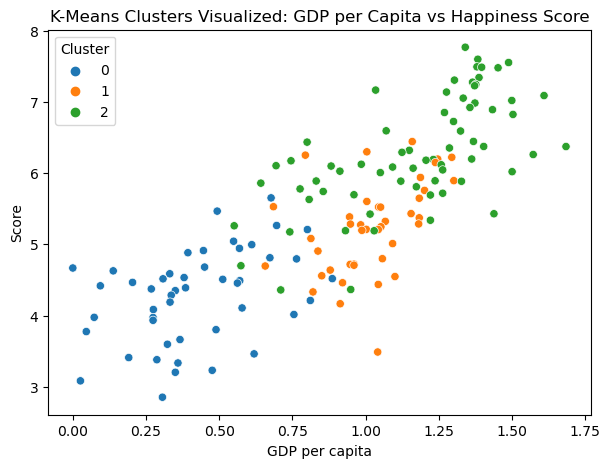

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Score
Cluster,,,,,
0,0.42,0.86,0.44,0.32,4.28
1,1.02,1.29,0.77,0.29,5.23
2,1.17,1.40,0.90,0.51,6.29


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=eda_df,
    x="GDP per capita",
    y="Score",
    hue="Cluster",
    palette="tab10"
)
plt.title("K-Means Clusters Visualized: GDP per Capita vs Happiness Score")
plt.show()

eda_df.groupby("Cluster")[X_cluster.columns.tolist() + ["Score"]].mean().round(2)

## Cross-Method Summary and Clustering Interpretation

Across the applied modeling techniques, economic prosperity (GDP per capita), social support, and health outcomes consistently emerge as strong contributors to national happiness scores.

Linear regression confirms a strong positive association between GDP per capita and happiness, while K-means clustering reveals distinct country profiles aligned with differing levels of economic and social development. These methods complement each other by highlighting both individual relationships and multivariate patterns.

K-means clustering groups countries into broad well-being profiles but relies on assumptions such as spherical clusters and a predefined number of clusters.

## 3. Time-Series Analysis (U.S. Unemployment)

Time-series analysis was conducted using U.S. unemployment data to explore temporal patterns, trends, and forecasting behavior. This analysis was included to complement the cross-sectional happiness analysis and to demonstrate how analytical approaches differ when working with time-dependent data.

The time-series analysis focused on:
- Examining long-term trends and seasonal patterns in unemployment rates.
- Testing for stationarity and applying differencing where necessary.
- Evaluating forecasting techniques to project future unemployment values.

Unlike the global happiness dataset, which represents a single snapshot in time, the unemployment data required methods that explicitly account for temporal dependence. This highlights the importance of selecting analytical techniques that align with the structure of the data and the research question being addressed.

This time-series discussion is illustrative and not directly integrated with the happiness dataset, which represents a single cross-sectional snapshot.

## Final Conclusions, Limitations, and Next Steps

### Conclusions
The modeling results support the hypothesis that economic and social factors play a central role in explaining cross-country differences in happiness. Simpler models provide interpretability, while multivariate approaches reveal broader structural patterns.

### Limitations
- The happiness dataset represents a single year and does not capture changes over time.
- Linear regression does not account for interactions between predictors.
- K-means clustering requires subjective choices such as the number of clusters.
- Cluster labels are not inherently meaningful without further contextual analysis.

### Next Steps
- Extend regression analysis to include multiple predictors simultaneously.
- Validate clustering results using alternative clustering methods.
- Incorporate longitudinal happiness data if available.
- Translate key findings into an interactive Tableau storyboard for stakeholder communication.